# Dataset: Haberman Survival Data set

- Data set is based on patients who had Undergone breast Cancer Surgery and their survival status after 5 years of operation

- Objective of Analysis: To find the number of people survived for 5 years or more and the number of people died before 5 years and to predict future of the patients who will undergo the surgery

- Dataset created by: Landwehr, J. M., Pregibon, D., and Shoemaker, A. C. (1984), Graphical Models for Assessing Logistic Regression Models

- Breast Cancer Surgery: https://www.cancer.org/cancer/breast-cancer/treatment/surgery-for-breast-cancer.html  \n
Age of the patient and Year of Surgery gives us a better understanding of the data.


In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

haberman = pd.read_csv("C:\\Users\\AN20003181\\Python\\haberman.csv")

### Basic Description of the Data:
It gives a basic overview of the Data that we have to analyse

##### Code Snippet

In [27]:
haberman.describe()

,age,year,nodes,status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


### Number of Data Points and number of features

In [2]:
haberman.shape

(306, 4)

### Definition of features in the Dataset

1. Age: The age at which the patients were operated for surgery
2. Year: The year at which the patient is operated
3. Nodes: No of positive nodes or lymph nodes
4. Status: Survival status of the patient,  1= Patient Survived 5 years or longer, 2= Patient Survived less than 5 year

In [3]:
haberman.columns

Index(['age', 'year', 'nodes', 'status'], dtype='object')

### Number of class: 
There are 2 class. They are:
1. Patient Survived 5 years or longer represented as "1" in the data set
2. Patient Survived less than 5 year represented as "2" in the data set

##### We can conclude from the above information that it is an Imbalanced Data set. 

In [4]:
haberman['status'].value_counts()

1    225
2     81
Name: status, dtype: int64

###### Now we move towards plotting the data set with the help of different plotting techniques to get the best feature



# Multivariate Plots

## 1. 2D Scatter Plot with No Color Coding

The plot is used to separate the points in the data set

##### Code Snippet

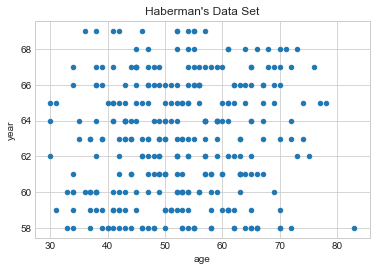

In [5]:
sns.set_style("whitegrid")
haberman.plot(kind='scatter', x='age', y='year', title="Haberman's Data Set")
plt.show()

#### Observation from the plot above:

- Cannot make much idea of the data from the graph.
- The Plot is not very useful as it doesnot use any colors to differentiate between statuses.
- Hence moving towards 2D scatter plots with color coding for better understanding of the data

## 2. 2D Scatter Plot with Color Coding

This plot is used to separate the status of the patient's survival based on different colors.

##### Code Snippet

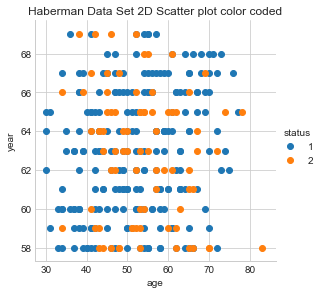

In [6]:
sns.set_style("whitegrid");
sns.FacetGrid(haberman, hue='status', size=4 )\
   .map(plt.scatter,'age','year')\
   .add_legend();
plt.title("Haberman Data Set 2D Scatter plot color coded")
plt.show();

#### Observation from the plot above:
- The Plot is better than the 2D scatter plot without color coding
- The status(1 and 2) cannot be properly separated using the plot as they have considerable overlap. 
- The blue colors are for patients who survived, marked as 1 in the legend, and the orange is for patients who didnt survive, marked as 2 in the legend, 5 years or more after surgery 
- Need to look at other Bi Variate solution (Pair Plots)

## 3. Pair Plot

The plot is used to understand the best set of features to explain relationship between two variables or to form the best separated clusters

##### Code Snippet

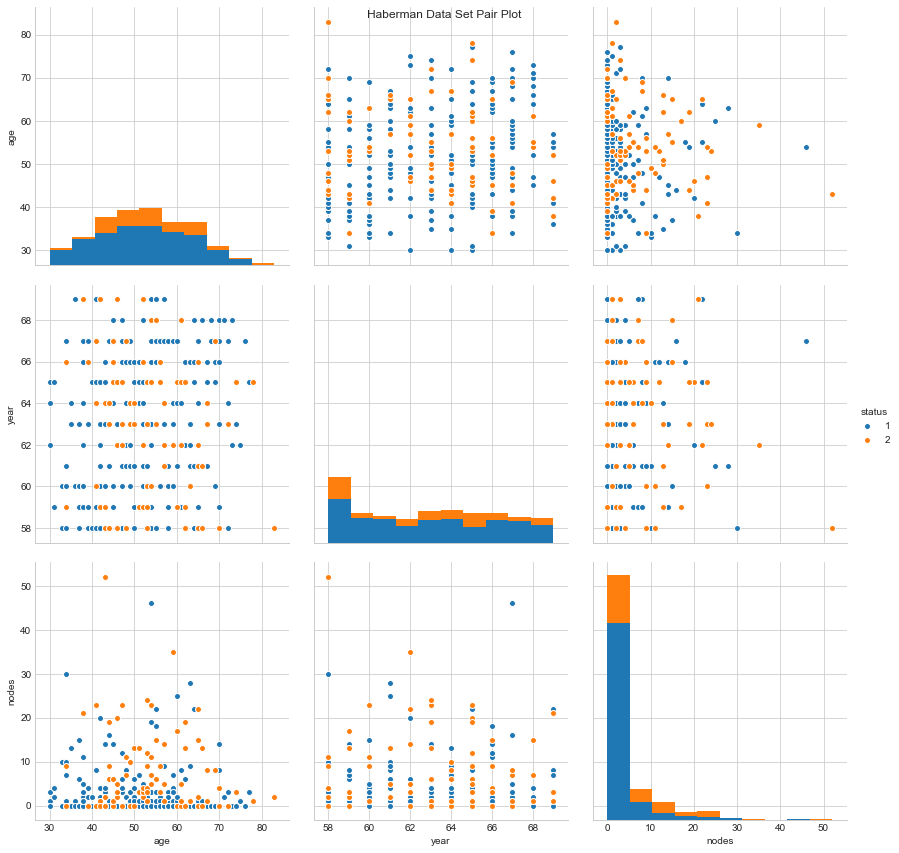

In [7]:
sns.set_style("whitegrid")
sns.pairplot(haberman, hue="status", vars=["age","year","nodes"], size=4)
plt.suptitle("Haberman Data Set Pair Plot")


plt.show()

#### Observation from the plot above:
1. Graph not very useful as we are unable to get any clear data feature combination to separate the status
2. We can use year and nodes to classify the data partially but not very useful to form a simple model
3. Age cannot be used as a feature to classify at all as it gives the most overlap
4. Moving towards Univariate Analysis for better understanding of the data set

# Univariate Analysis

## 1. 1D scatter plot

Used to generally 1 Dimensional point of visualization. Here we perform the plot on three features to identify the best feature

1. Age
2. Year of Operation
3. Lymph Nodes



##### Code Snippet

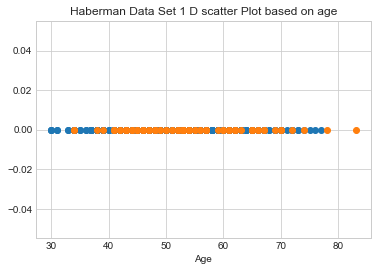

In [8]:
import numpy as np
haberman_cancerpatientsurvived=haberman.loc[haberman["status"]==1]
haberman_cancerpatientnotsurvived=haberman.loc[haberman["status"]==2]

plt.plot(haberman_cancerpatientsurvived["age"], np.zeros_like(haberman_cancerpatientsurvived['age']), 'o')
plt.plot(haberman_cancerpatientnotsurvived["age"], np.zeros_like(haberman_cancerpatientnotsurvived['age']), 'o')

plt.xlabel("Age")
plt.title("Haberman Data Set 1 D scatter Plot based on age")

plt.show() 

### Observations from the plot above
1. Points are overlapping. No clear differentiation between the status.

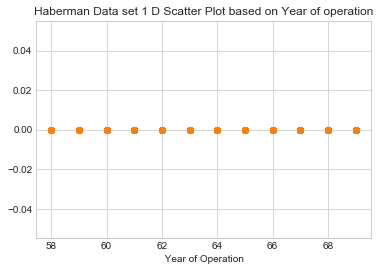

In [9]:
import numpy as np
haberman_cancerpatientsurvived=haberman.loc[haberman["status"]==1]
haberman_cancerpatientnotsurvived=haberman.loc[haberman["status"]==2]

plt.plot(haberman_cancerpatientsurvived["year"], np.zeros_like(haberman_cancerpatientsurvived['year']), 'o')
plt.plot(haberman_cancerpatientnotsurvived["year"], np.zeros_like(haberman_cancerpatientnotsurvived['year']), 'o')

plt.xlabel(" Year of Operation")
plt.title("Haberman Data set 1 D Scatter Plot based on Year of operation")

plt.show()


### Observations from the plot above
1. Points are overlapping. No clear differentiation between the status.

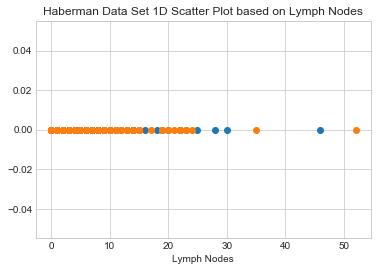

In [10]:
import numpy as np
haberman_cancerpatientsurvived=haberman.loc[haberman["status"]==1]
haberman_cancerpatientnotsurvived=haberman.loc[haberman["status"]==2]

plt.plot(haberman_cancerpatientsurvived["nodes"], np.zeros_like(haberman_cancerpatientsurvived['nodes']), 'o')
plt.plot(haberman_cancerpatientnotsurvived["nodes"], np.zeros_like(haberman_cancerpatientnotsurvived['nodes']), 'o')

plt.xlabel("Lymph Nodes")
plt.title("Haberman Data Set 1D Scatter Plot based on Lymph Nodes")

plt.show()


### Observations from the above plot:
1. Points are mostly overlapping. No clear differentiation between the status.
2. The Plot is not very useful in finding the best feature.

Moving towards PDF,CDF,Histogram, Box Plot and Violin Plot 

## 2. Histogram and PDF

Used to find the density of points. We will proceed to find the density of each feature to classify the best feature
1. Age
2. Year
3. Lymph Nodes

#### Code Snippet

C:\Users\AN20003181\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\AN20003181\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


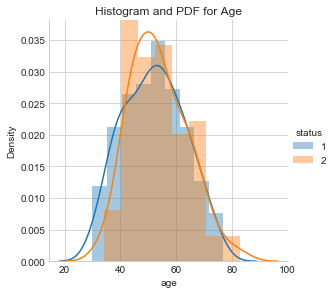

In [11]:
sns.FacetGrid(haberman, hue="status", size=4)\
   .map(sns.distplot,"age")\
   .add_legend()

plt.ylabel("Density")
plt.title("Histogram and PDF for Age")

plt.show()

C:\Users\AN20003181\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\AN20003181\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


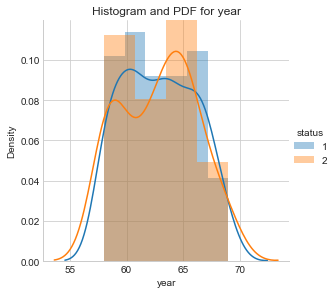

In [12]:
sns.FacetGrid(haberman, hue="status", size=4)\
   .map(sns.distplot,"year")\
   .add_legend()

plt.ylabel("Density")
plt.title("Histogram and PDF for year")

plt.show()

C:\Users\AN20003181\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\AN20003181\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


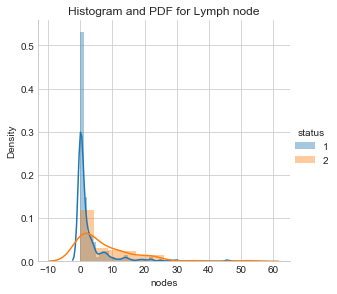

In [13]:
sns.FacetGrid(haberman, hue="status", size=4)\
   .map(sns.distplot,"nodes")\
   .add_legend()

plt.ylabel("Density")
plt.title("Histogram and PDF for Lymph node")

plt.show()

### Observation from the plots above:
1. In all the graphs the features are overlapping with each other. So no clear identification of best feature that can be used
2. For lymph node value between 0 and 1 the density for survival is more than the density of not surviving the operation
3. Most of the node value for survival is lieing between 0 and 3
4. Nodes still providing a better view than age and year
5. Moving towards CDF to see if we can get a better view to get the best feature for model building

## 3. Cumulative Distributive Function(CDF):

This function Gives a Probability of the Variables(Features). We will plot the graph for all the Three Features:
1. Nodes
2. Age 
3. Year of Operation

##### Code Snippet for CDF with Nodes

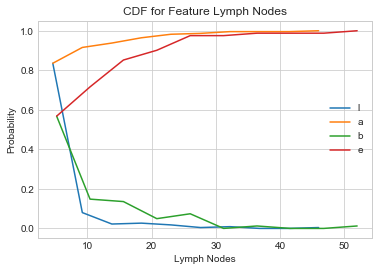

In [14]:
label=["PDF for Status 1", "CDF for status 1", "PDF for status 2", "CDF for status 2"]

# for status 1
counts, bin_edges = np.histogram(haberman_cancerpatientsurvived['nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)


# for status 2
counts, bin_edges = np.histogram(haberman_cancerpatientnotsurvived['nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)

plt.title("CDF for Feature Lymph Nodes")
plt.xlabel("Lymph Nodes")
plt.ylabel("Probability")
plt.legend("label")


plt.show();

### Observation from the Plot above:
1. Data features cannot be separated properly in the plot
2. If node value is 5 or less there is 85% chance of patient surviving the operation
3. Survival chances decreases if the nodes increases

##### Code Snippet for CDF with age

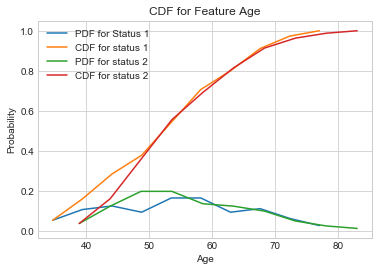

In [15]:
label=["PDF for Status 1", "CDF for status 1", "PDF for status 2", "CDF for status 2"]

# for status 1
counts, bin_edges = np.histogram(haberman_cancerpatientsurvived['age'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)


# for status 2
counts, bin_edges = np.histogram(haberman_cancerpatientnotsurvived['age'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)

plt.title("CDF for Feature Age")
plt.xlabel("Age")
plt.ylabel("Probability")
plt.legend(label)


plt.show();

#### Observation from the plot above:
1. Points mostly overlapping for ages.
2. We can conclude if the age is 45 or less the probability of no surviving is between 0 and 0.3
3. Age is not a good feature to separate status

#### Code Snippet for CDF with year

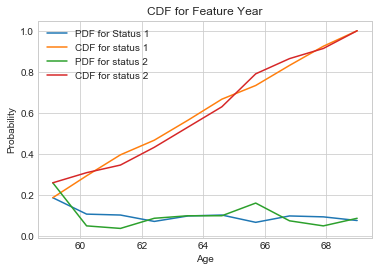

In [16]:
label=["PDF for Status 1", "CDF for status 1", "PDF for status 2", "CDF for status 2"]

# for status 1
counts, bin_edges = np.histogram(haberman_cancerpatientsurvived['year'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)


# for status 2
counts, bin_edges = np.histogram(haberman_cancerpatientnotsurvived['year'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)



plt.title("CDF for Feature Year")
plt.xlabel("Age")
plt.ylabel("Probability")
plt.legend(label)
plt.show();

### Observations from the plot above:
1. Point are overlapping massively. Cannot be used as a feature.

## Overall Observation from the CDF Plots:

1. We can conclude that nodes provide better separation than the other features for data separation
2. We are unable to find the best feature for the separation of status that wil fullfill our objective
3. We are moving toward other univariate plots to assess if we can find the best feature

## 4. Box Plot

It is simple way of representing the data in a box using the Second and the Third Quartile. We will plot the box plot for:

1. Nodes
2. Age
3. year

To find the best feature

##### Code Snippet

### Median, Quantiles and MAD for Nodes:

In this we will find the Median, Quantiles and the Median Absolute Deviation. We will use this parameters for Box Plot

##### Code Snippet

In [17]:
print("\nMedians:")
print(np.median(haberman_cancerpatientsurvived['nodes']))
print(np.median(haberman_cancerpatientnotsurvived['nodes']))


print("\nQuantiles:")
print(np.percentile(haberman_cancerpatientsurvived['nodes'],np.arange(0, 100, 25)))
print(np.percentile(haberman_cancerpatientnotsurvived['nodes'],np.arange(0, 100, 25)))

from statsmodels import robust
print ("\nMedian Absolute Deviation")
print(robust.mad(haberman_cancerpatientsurvived['nodes']))
print(robust.mad(haberman_cancerpatientnotsurvived['nodes']))


Medians:
0.0
4.0

Quantiles:
[0. 0. 0. 3.]
[ 0.  1.  4. 11.]

Median Absolute Deviation
0.0
5.930408874022408


##### Plot:

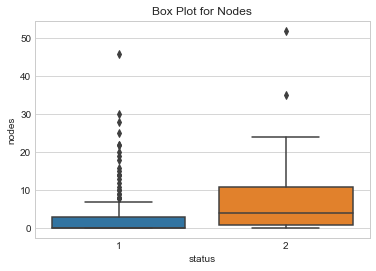

In [18]:
plt.title("Box Plot for Nodes")
sns.boxplot(x="status", y="nodes", data=haberman)
plt.show()

### Observation from the plot above:
1. Lot of outliers for status 1 compared to status 2 which has only 2 outliers
2. The node median for surviving patients is 0 and for not surviving is 4.0. So we can conclude that patients with 0 nodes has 50% chance of surviving the operation.
3. From the status of 1 we can say if the node value is between 0 and 5 there is 75% chance of survival as most of the points lie between nodes 0 and 5
4. If node value is more than 5 and less than around 13 the patient has 50% to 75% chance of patient not surviving the operation


### Median, Quantiles and MAD for age:

1. Median: Value lying in the midpoint of the midpoint of the sorted Data set. It is also known as 50th Percentile
2. Quantiles: Quantile is where a sample is divided into equal-sized, adjacent, subgroups (that’s why it’s sometimes called a “fractile“). It can also refer to dividing a probability distribution into areas of equal probability. Here we find the quantiles at 0, 100 and 25 for our graphs
3. MAD: Also known as Mean Absolute Deviation, it is the average absolute deviation of a data set is the average of the absolute deviations from a central point.

##### Code Snippet:

In [19]:

print("\nMedians:")
print(np.median(haberman_cancerpatientsurvived['age']))
print(np.median(haberman_cancerpatientnotsurvived['age']))


print("\nQuantiles:")
print(np.percentile(haberman_cancerpatientsurvived['age'],np.arange(0, 100, 25)))
print(np.percentile(haberman_cancerpatientnotsurvived['age'],np.arange(0, 100, 25)))

from statsmodels import robust
print ("\nMedian Absolute Deviation")
print(robust.mad(haberman_cancerpatientsurvived['age']))
print(robust.mad(haberman_cancerpatientnotsurvived['age']))


Medians:
52.0
53.0

Quantiles:
[30. 43. 52. 60.]
[34. 46. 53. 61.]

Median Absolute Deviation
13.343419966550417
11.860817748044816


### Plot:

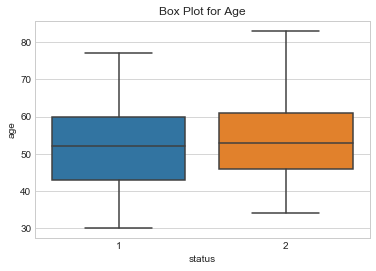

In [20]:
plt.title("Box Plot for Age")
sns.boxplot(x="status", y="age", data=haberman)
plt.show()

### Observation from the plot above:
1. Plot not very useful as points are overlapping and we cannot get an understanding of the data

## Median, Quantiles and MAD for year:

##### Code Snippet:

In [21]:
print("\nMedians:")
print(np.median(haberman_cancerpatientsurvived['year']))
print(np.median(haberman_cancerpatientnotsurvived['year']))


print("\nQuantiles:")
print(np.percentile(haberman_cancerpatientsurvived['year'],np.arange(0, 100, 25)))
print(np.percentile(haberman_cancerpatientnotsurvived['year'],np.arange(0, 100, 25)))

from statsmodels import robust
print ("\nMedian Absolute Deviation")
print(robust.mad(haberman_cancerpatientsurvived['year']))
print(robust.mad(haberman_cancerpatientnotsurvived['year']))


Medians:
63.0
63.0

Quantiles:
[58. 60. 63. 66.]
[58. 59. 63. 65.]

Median Absolute Deviation
4.447806655516806
4.447806655516806


#### Plot:

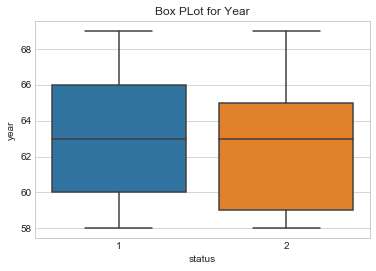

In [22]:
plt.title("Box PLot for Year")
sns.boxplot(x="status", y="year", data=haberman)
plt.show()

#### Observation from the plot above:
1. Graph not very useful as points are mostly overlapping and we cannot create a clear understanding of the data
2. Medians overlap for the 
2. We can say if the year of operation is between 58 and 59 then the chances of surviving is less
3. We can also say if the year of operation is between 65 and 66 then the chances of surviving is more

### Overall observation from the Box Plot:
1. Node is by far the best feature for Data classification
2. We can build a simple model using Box Plot for Node.
3. Year can also be used but it is not as effective as Node
4. Age can not be used as a feature at all

## 5. Violin Plot

This plot combines the benefits of both the Box Plot and the PDF. The graph is fatter at the points where the density is more and slimmer where the Density is less

We will use Violin  Plot for 3 features to find the best among them

1. Node
2. Age
3. Year

#### Violin Plot for Nodes:
##### Code Snippet

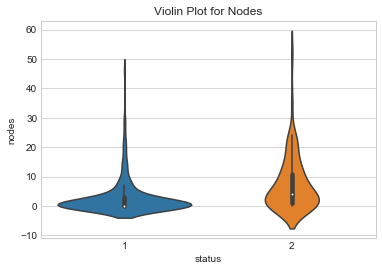

In [23]:
plt.title("Violin Plot for Nodes")
sns.violinplot(x="status", y="nodes", data=haberman, size=8)
plt.show()

### Observation:
1. For Status 1 most of the nodes lie between 0 and 2 with the graph most bulged between 0 and 1. We can use this feature to build a simple model to classify the patients undergoing operation
2. For Status 2 most of the nodes lie between 3 and 10 and flattens out after that. 
3. We can use this feature to classify the status of the patients who will survive the operation after 5 years and who will not and build a simple model for the same

### Violin Plot for Age:

##### Code Snippet

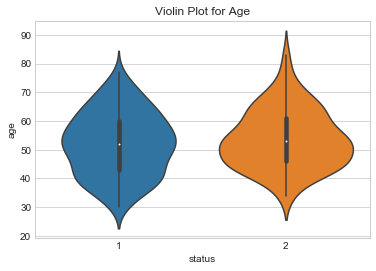

In [24]:
plt.title("Violin Plot for Age")
sns.violinplot(x="status", y="age", data=haberman, size=8)
plt.show()

### Observation:
1. Both the plots are fatter around the same points. Feature not useful for Classification.

### Violin Plot for Year

##### Code Snippet

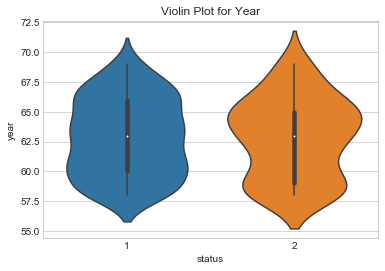

In [25]:
plt.title("Violin Plot for Year")
sns.violinplot(x="status", y="year", data=haberman, size=8)
plt.show()

### Observation:
1. Both the plots are fatter around the same points. Feature cannot be used to classify

## Overall Observation from the Violin Plots:

1. Nodes is by far the best feature for classification
2. Age and year of operation is not very Useful feature

## Conclusion from the Analysis:

1. From all the plots above we can see that nodes is the best feature to classify data than age of the patient or the year of operation.
2. Box Plot and Violin Plots are the most useful way to find the best feature in the data set to classify the data.
3. We can build a simple model to classify the data using the Node feature.
4. The model built using the plot will not be 100% precise as there is a lot of overlap of data and outliers present in the dataset
